In [39]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv("income.csv")

In [12]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

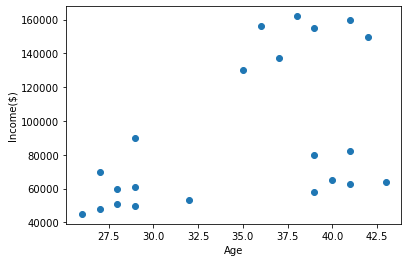

In [15]:
plt.scatter(data.Age,data['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [25]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(data[['Age','Income($)']])
data['Cluster']=y_predicted
data

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [32]:
df1=data[data['Cluster']==0]
df2=data[data['Cluster']==1]
df3=data[data['Cluster']==2]

In [35]:
df3

,Name,Age,Income($),Cluster
2,Mohan,29,61000,2
3,Ismail,28,60000,2
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2
14,Stark,29,49500,2
15,Ranbir,32,53000,2
16,Dipika,40,65000,2
17,Priyanka,41,63000,2
18,Nick,43,64000,2


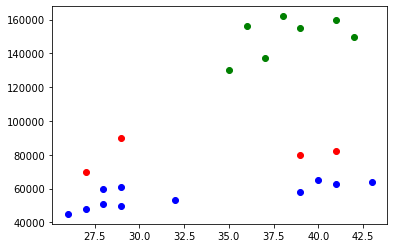

In [37]:
plt.scatter(df1.Age,df1["Income($)"],c='r')
plt.scatter(df2.Age,df2["Income($)"],c='g')
plt.scatter(df3.Age,df3["Income($)"],c='b')

In [51]:
scaler=MinMaxScaler()
scaler.fit(data[['Age',"Income($)"]])
data['Age']=scaler.fit_transform(data[['Age']])
data['Income($)']=scaler.fit_transform(data[['Income($)']])

In [52]:
data

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [53]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(data[['Age','Income($)']])
data['Cluster']=y_predicted
data

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [55]:
df1=data[data['Cluster']==0]
df2=data[data['Cluster']==1]
df3=data[data['Cluster']==2]

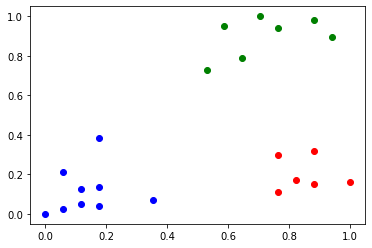

In [56]:
plt.scatter(df1.Age,df1["Income($)"],c='r')
plt.scatter(df2.Age,df2["Income($)"],c='g')
plt.scatter(df3.Age,df3["Income($)"],c='b')

In [63]:
sse=[]
kr=range(1,10)
for k in kr:
    km=KMeans(n_clusters=k)
    y_predicted=km.fit_predict(data[['Age','Income($)']])
    sse.append(km.inertia_)

    

C:\Users\MK PERUMALLA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


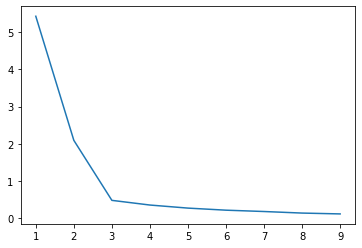

In [64]:
plt.plot(kr,sse)

In this case the elbow was generated at the point 3 so the optimal value of k is 3

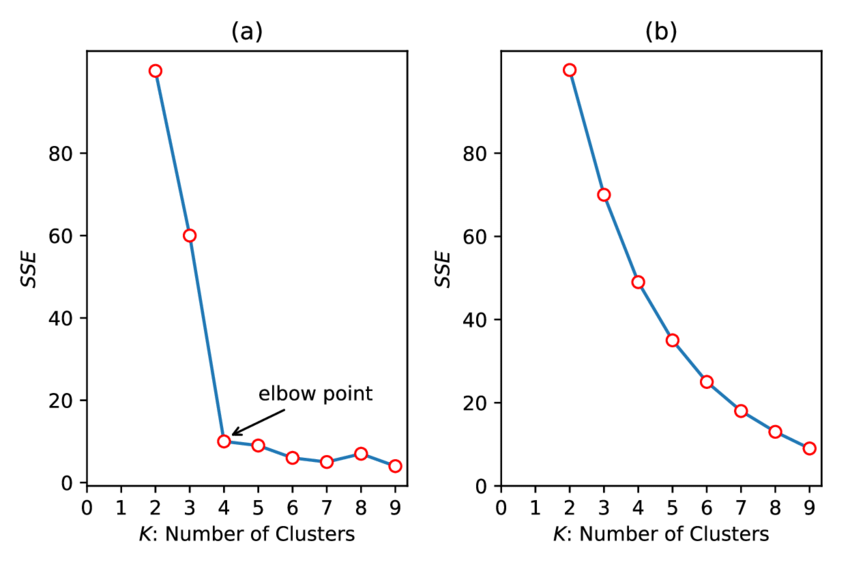

we need to select the k value by elbow method. For that we need to plot the sse for different values of k after that plot them in the graph then choose the point that could exactly like elbow point of our hand that k value is the optimal for best clustering algorithm